Import Library

In [1]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import time

Import dataset dan menampilkan info dataset

In [2]:
df=pd.read_csv('drive/MyDrive/Bengkod/UAS/ObesityDataSet.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

Rename kolom

In [3]:
df.columns=['age','gender','height','weight','alcohol','calories','vegetables','eat/day','cal/day','smoke','water','carrier','physical','gadget','snack','transport','obesity']
df.head(10)

,age,gender,height,weight,alcohol,calories,vegetables,eat/day,cal/day,smoke,water,carrier,physical,gadget,snack,transport,obesity
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
5,29,Male,1.62,53,Sometimes,yes,2,3,no,no,2,no,0,0,Sometimes,Automobile,Normal_Weight
6,23,Female,1.5,55,Sometimes,yes,3,3,no,no,2,yes,1,0,Sometimes,Motorbike,Normal_Weight
7,22,Male,1.64,53,Sometimes,no,2,3,no,no,2,no,3,0,Sometimes,Public_Transportation,Normal_Weight
8,24,Male,1.78,348.49777557852735,Frequently,yes,3,3,no,no,2,yes,1,1,Sometimes,Public_Transportation,Normal_Weight
9,22,Male,1.72,68,no,yes,2,3,no,no,2,yes,1,1,Sometimes,Public_Transportation,Normal_Weight


Jumlah data kosong pada masing-masing kolom

In [4]:
df.isnull().sum()

,0
age,14
gender,9
height,12
weight,11
alcohol,5
calories,11
vegetables,8
eat/day,12
cal/day,10
smoke,5


Mengubah ? menjadi NaN

In [5]:
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)
df.replace("?", py.nan, inplace=True)
df.isnull().sum()

,0
age,22
gender,22
height,22
weight,19
alcohol,20
calories,22
vegetables,18
eat/day,22
cal/day,18
smoke,13


Drop kolom yang memiliki data kosong

In [6]:
df.dropna(inplace=True)
df.isnull().sum()

,0
age,0
gender,0
height,0
weight,0
alcohol,0
calories,0
vegetables,0
eat/day,0
cal/day,0
smoke,0


Jumlah data unik pada kolom

In [7]:
print(df.nunique())

age           1215
gender           2
height        1361
weight        1321
alcohol          4
calories         2
vegetables     702
eat/day        551
cal/day          2
smoke            2
water         1097
carrier          2
physical      1032
gadget         973
snack            4
transport        5
obesity          7
dtype: int64


Jumlah data duplikat

In [8]:
dupe=df.duplicated().sum()
print("Duplikat = ",dupe)

Duplikat =  18


Hapus kolom yang duplikat

In [9]:
df.drop_duplicates(inplace=True)
dupe=df.duplicated().sum()
print("Duplikat = ",dupe)

Duplikat =  0


Distribusi data pada kolom obesity

Distribusi Kelas:
obesity
Obesity_Type_I         314
Obesity_Type_III       270
Obesity_Type_II        250
Normal_Weight          247
Overweight_Level_II    243
Overweight_Level_I     240
Insufficient_Weight    229
Name: count, dtype: int64


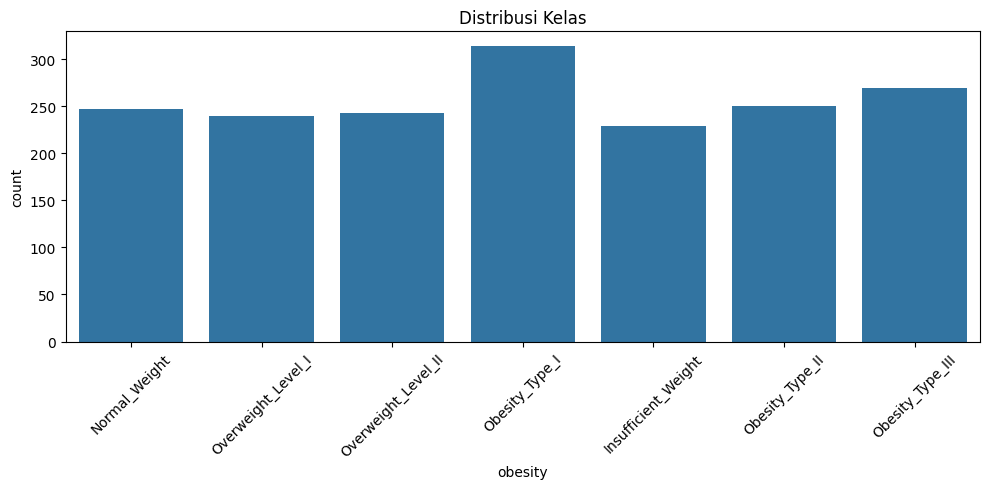

In [10]:
print("Distribusi Kelas:")
print(df['obesity'].value_counts())

plt.figure(figsize=(10, 5))  # Optional: buat plot lebih lebar
sns.countplot(data=df, x='obesity')

plt.title('Distribusi Kelas')
plt.xticks(rotation=45)  # Putar label sumbu X sebesar 45 derajat
plt.tight_layout()       # Supaya layout tidak mepet
plt.show()

Ubah tipe data kolom yang memiliki data numerik

In [11]:
for col in df.select_dtypes(include='object').columns:
    try:
        df[col] = pd.to_numeric(df[col], errors='raise')
    except ValueError:
        pass
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1793 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1793 non-null   float64
 1   gender      1793 non-null   object 
 2   height      1793 non-null   float64
 3   weight      1793 non-null   float64
 4   alcohol     1793 non-null   object 
 5   calories    1793 non-null   object 
 6   vegetables  1793 non-null   float64
 7   eat/day     1793 non-null   float64
 8   cal/day     1793 non-null   object 
 9   smoke       1793 non-null   object 
 10  water       1793 non-null   float64
 11  carrier     1793 non-null   object 
 12  physical    1793 non-null   float64
 13  gadget      1793 non-null   float64
 14  snack       1793 non-null   object 
 15  transport   1793 non-null   object 
 16  obesity     1793 non-null   object 
dtypes: float64(8), object(9)
memory usage: 252.1+ KB


Ubah tipe data kolom yang memiliki data kategori

In [12]:
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1793 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1793 non-null   float64
 1   gender      1793 non-null   int64  
 2   height      1793 non-null   float64
 3   weight      1793 non-null   float64
 4   alcohol     1793 non-null   int64  
 5   calories    1793 non-null   int64  
 6   vegetables  1793 non-null   float64
 7   eat/day     1793 non-null   float64
 8   cal/day     1793 non-null   int64  
 9   smoke       1793 non-null   int64  
 10  water       1793 non-null   float64
 11  carrier     1793 non-null   int64  
 12  physical    1793 non-null   float64
 13  gadget      1793 non-null   float64
 14  snack       1793 non-null   int64  
 15  transport   1793 non-null   int64  
 16  obesity     1793 non-null   int64  
dtypes: float64(8), int64(9)
memory usage: 252.1 KB


Menampilkan outliers pada masing-masing kolom

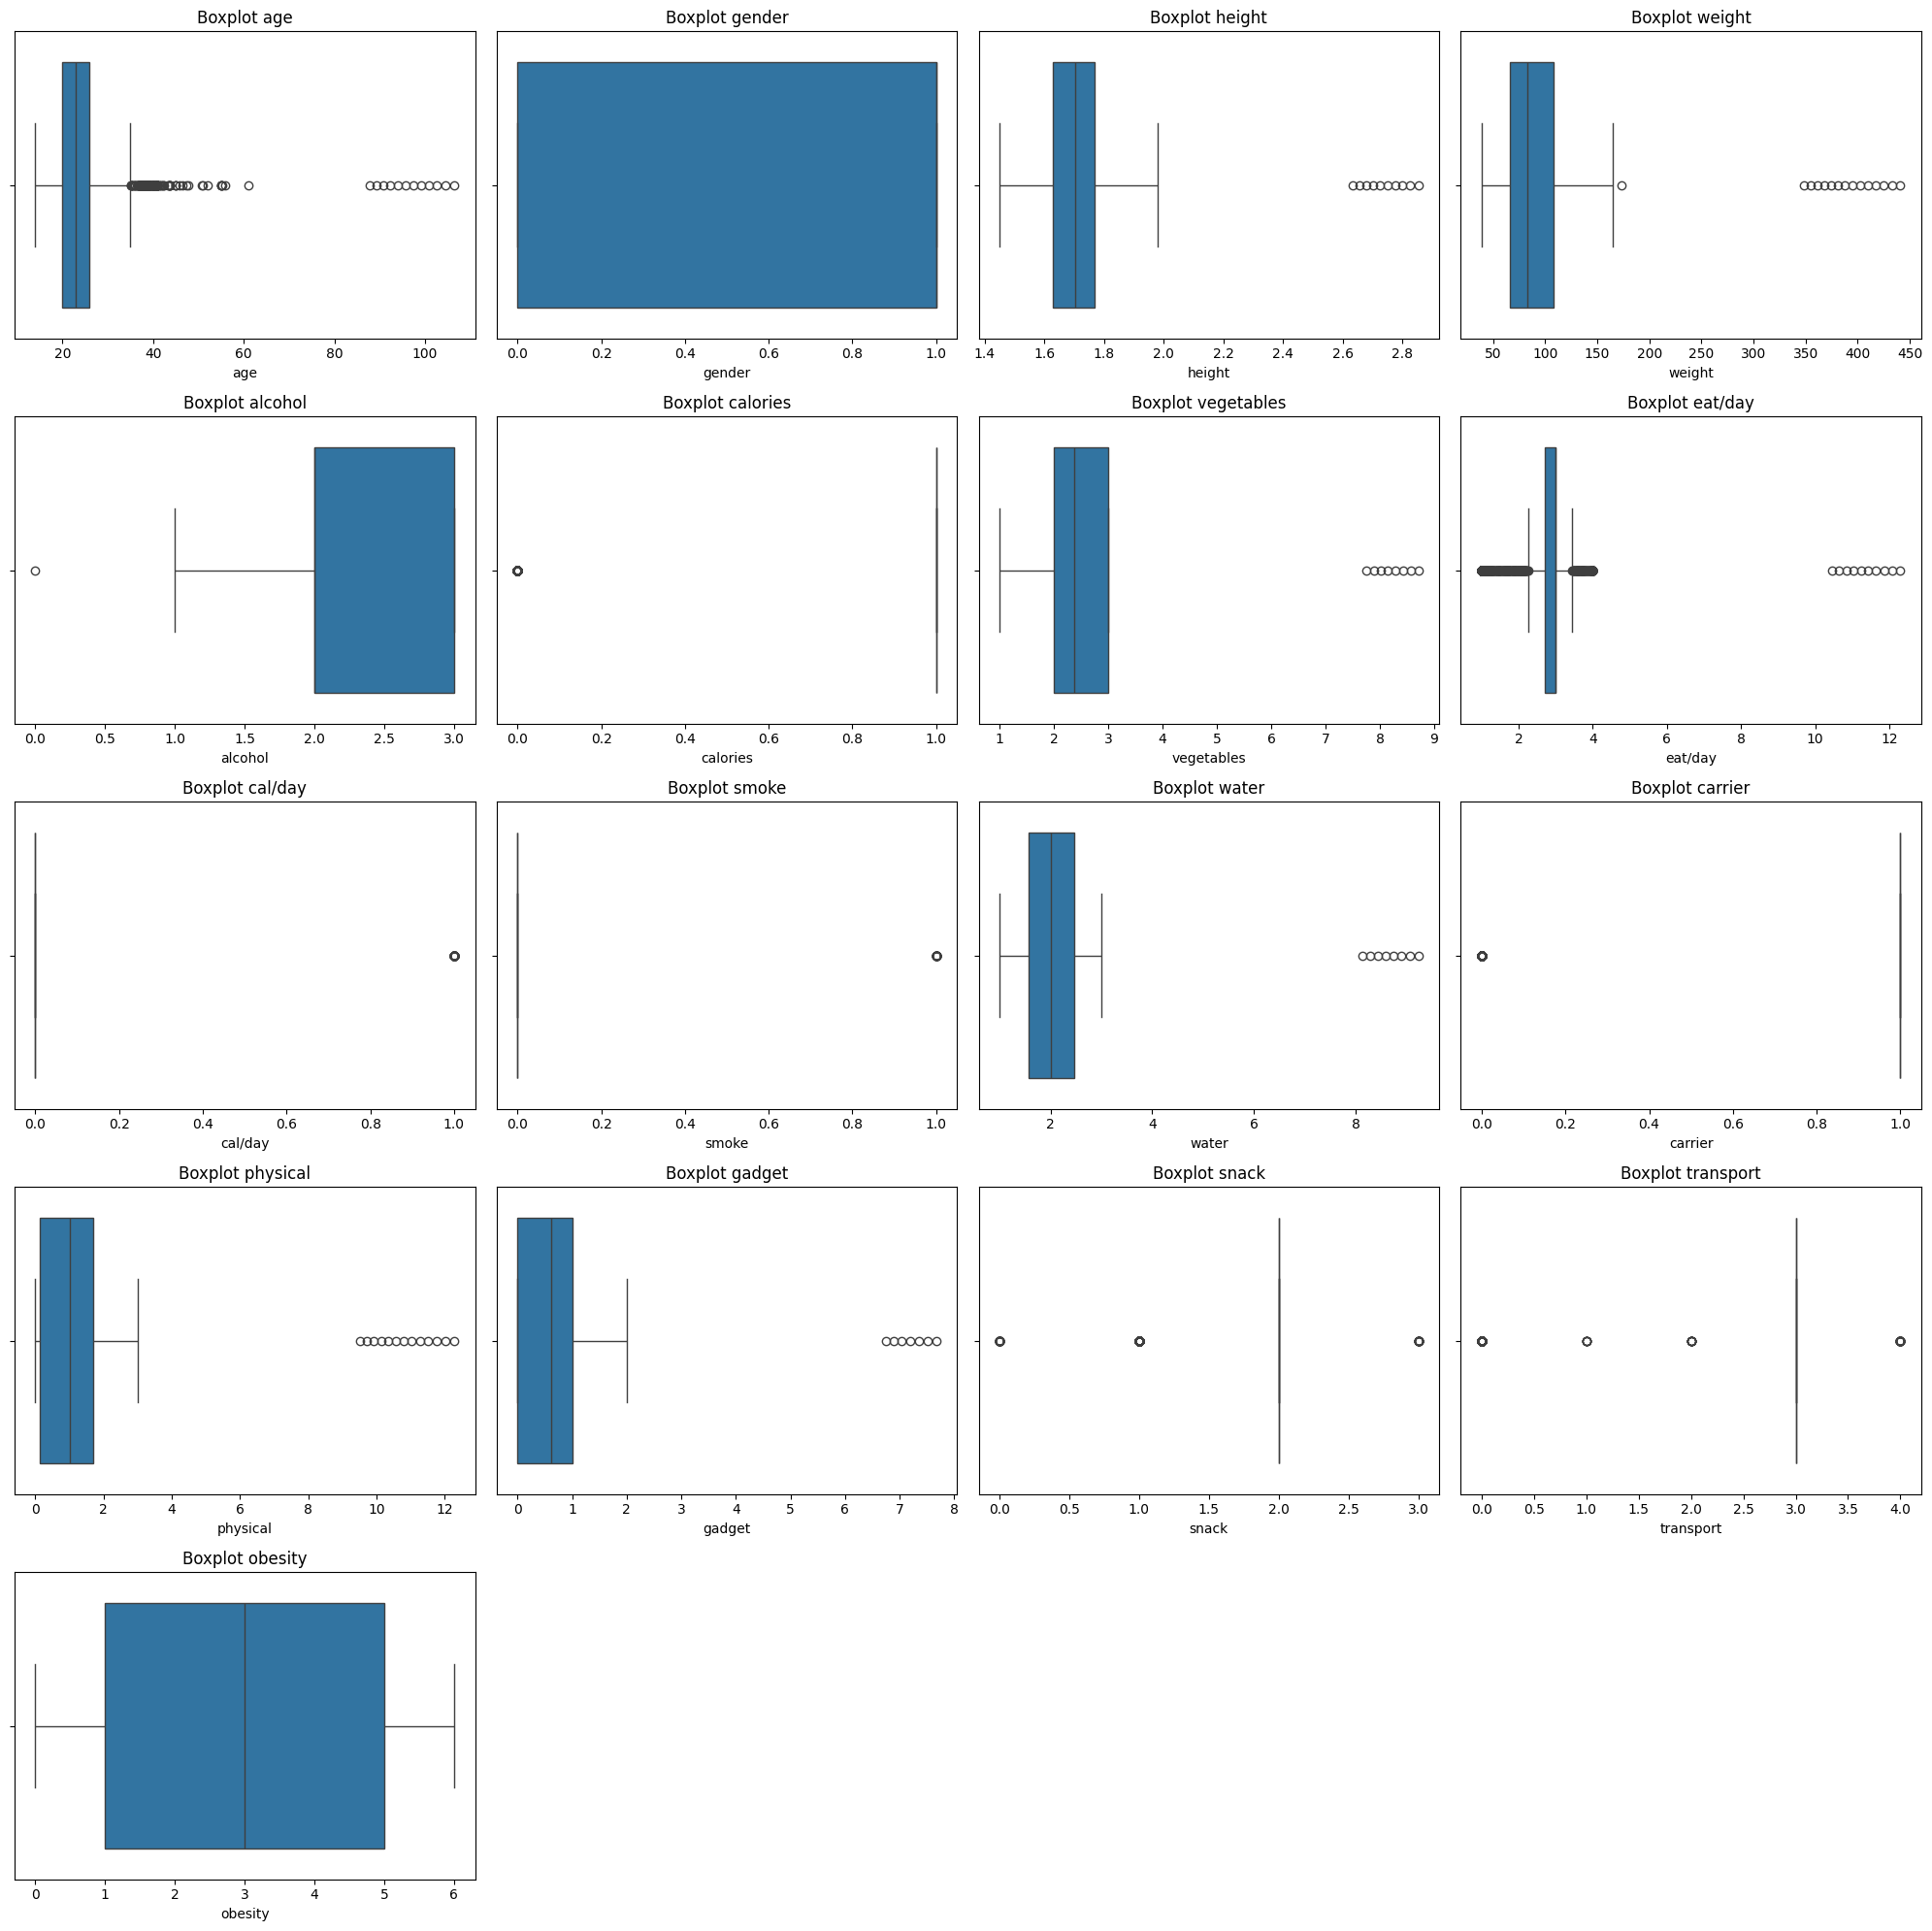

In [13]:
# Ambil kolom numerik
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Tentukan jumlah kolom dan ukuran grid (misal: 3 kolom per baris)
n_cols = 4
n_plots = len(numeric_cols)
n_rows = math.ceil(n_plots / n_cols)

# Buat grid subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()  # agar bisa diakses dengan 1D index

# Loop dan buat boxplot di tiap subplot
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot {col}')
    axes[i].tick_params(axis='x')

# Hapus subplot kosong jika ada
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Cek korelasi semua kolom dengan kolom targaet (obesity)

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['age','gender','height','weight','alcohol','calories','vegetables',
                      'eat/day','cal/day','smoke','water','carrier','physical','gadget',
                      'snack','transport','obesity']

# Gunakan korelasi Spearman supaya ordinal juga bisa dihitung korelasinya
corr = df[numerical_features].corr(method='spearman')
print("Spearman Correlation Result")
print(corr['obesity'].sort_values(ascending=False))



Spearman Correlation Result
obesity       1.000000
weight        0.407161
snack         0.344229
carrier       0.343676
age           0.284745
water         0.081677
height        0.063461
calories      0.052911
gender        0.030644
vegetables    0.027024
smoke        -0.022743
cal/day      -0.039730
gadget       -0.056399
transport    -0.059931
physical     -0.121142
eat/day      -0.129968
alcohol      -0.147706
Name: obesity, dtype: float64


Dari hasli korelasi diatas, bisa disimpulkan bahwa fitur utama yang harus di pilih adalah weight, snack, carrier, dan age.

Untuk kolom yang korelasi < 0.1 bisa dipertimbangkan dahulu, dan kolom yang korelasinya < 0 bisa langsung di skip


In [15]:
df.drop(columns=['smoke','cal/day','gadget','transport','physical','eat/day','alcohol'], inplace=True)

In [16]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

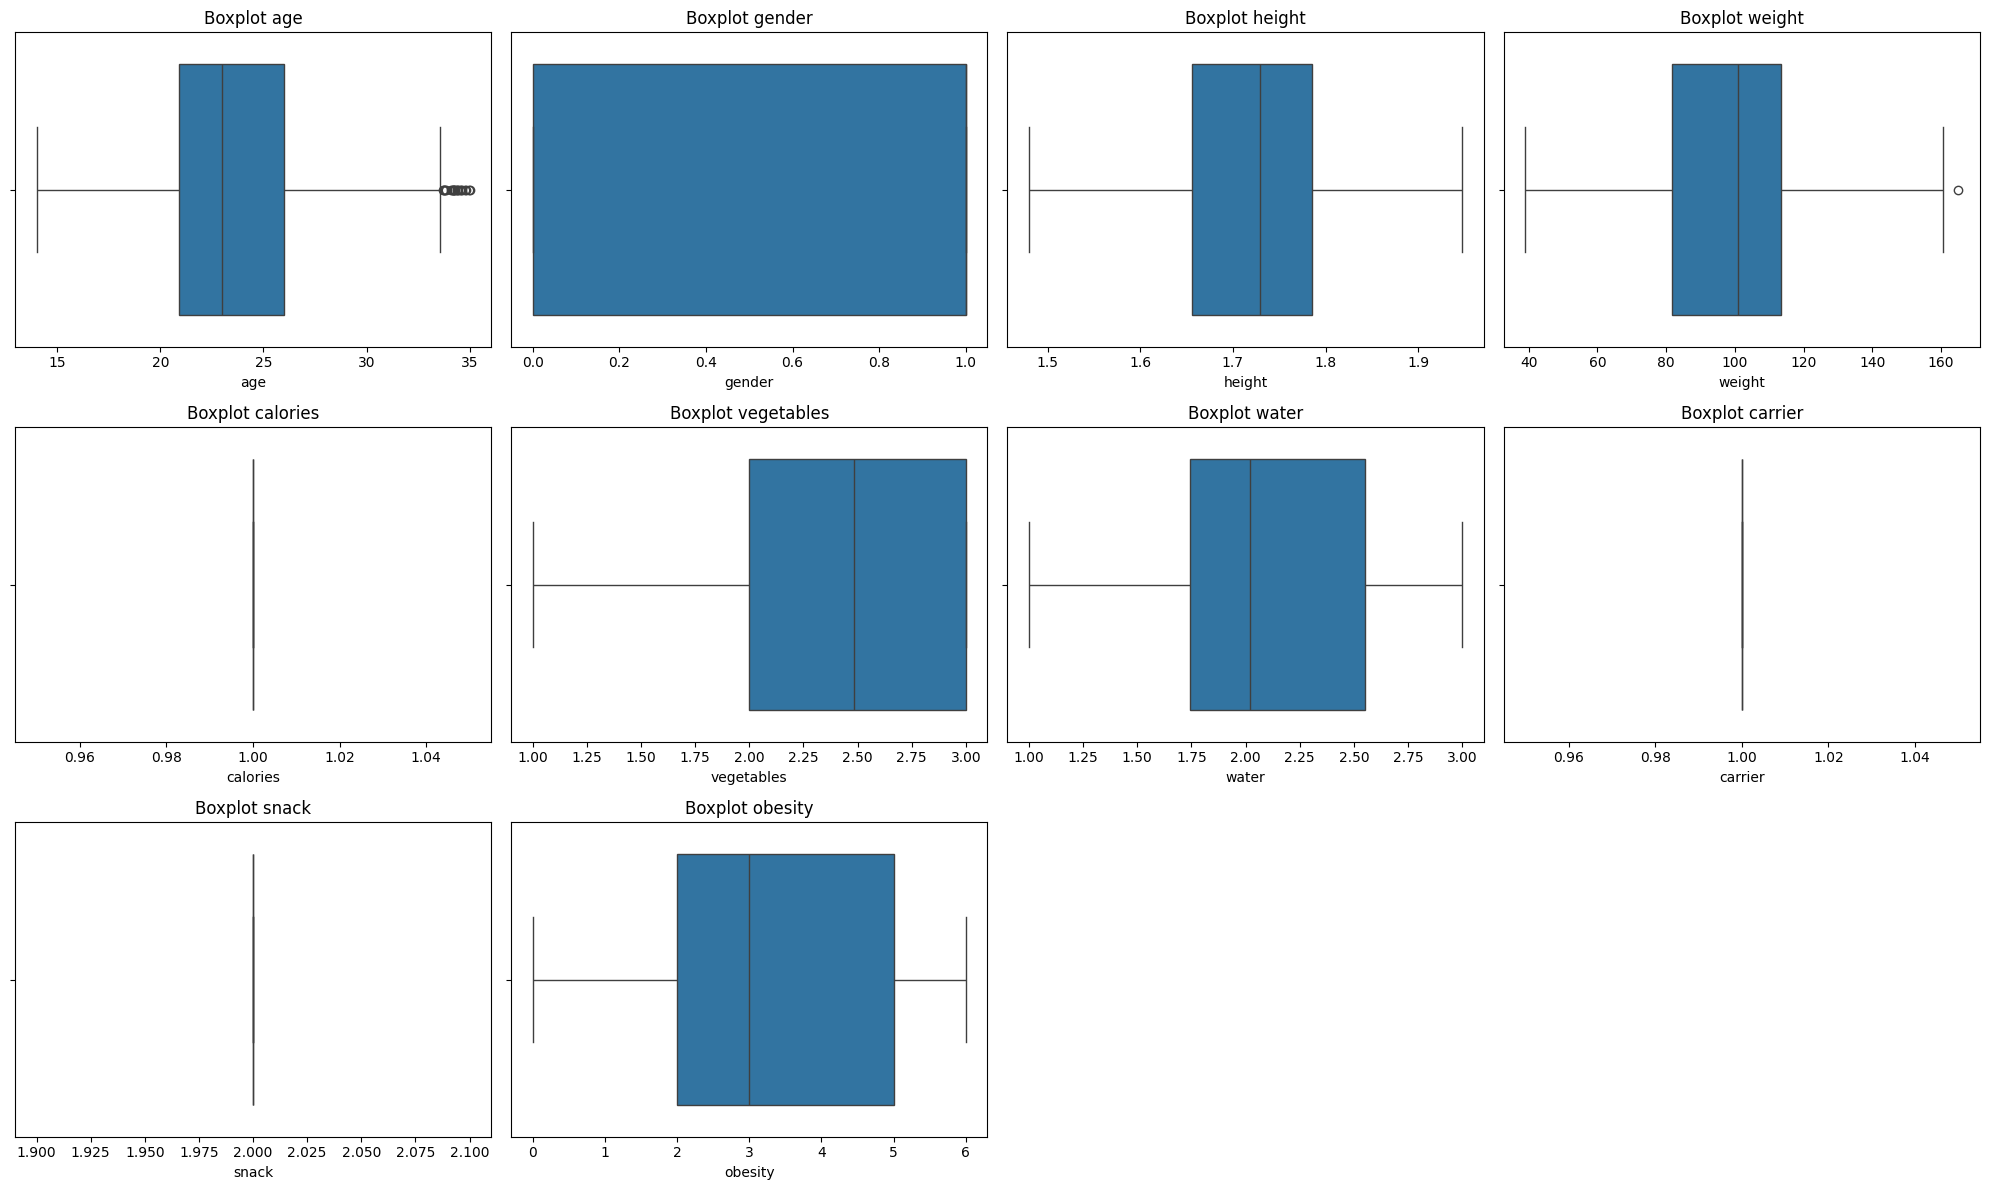

In [17]:
n_cols = 4
n_plots = len(numeric_cols)
n_rows = math.ceil(n_plots / n_cols)

# Buat grid subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()  # agar bisa diakses dengan 1D index

# Loop dan buat boxplot di tiap subplot
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot {col}')
    axes[i].tick_params(axis='x')

# Hapus subplot kosong jika ada
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Outliers sudah dihapus walalupun masih ada sedikit di kolom age dan weight, dan kolom dengan korelasi < 0 sudah di hapus

In [18]:
X = df.drop(columns=['obesity'])  # Masukkan semua fitur kecuali target
y = df['obesity']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [19]:
def evaluate_model(model,X_train_smote,X_test,y_train_smote,y_test):
  model.fit(X_train_smote,y_train_smote)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred,average='weighted')
  recall= recall_score(y_test,y_pred,average='weighted')
  f1 = f1_score(y_test,y_pred,average='weighted')
  start = time.perf_counter()
  end = time.perf_counter()
  train_time = end - start
  report = classification_report(y_test,y_pred)
  return accuracy,precision,recall,f1,report,train_time

In [20]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN" : KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC()
}

In [21]:
result = {}
for name, model in models.items():
    accuracy, precision, recall, f1, report, train_time = evaluate_model(model, X_train, X_test, y_train, y_test)

    # Gabungkan report dan training time
    extended_report = report + f"\nTraining Time: {train_time:.9f} seconds"

    result[name] = (accuracy, precision, recall, f1, extended_report)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [22]:
for name,(accuracy,precision,recall,f1,report) in result.items():
  print(f"Model: {name}")
  print("Classification Report:")
  print(report)
  print("-" *50)

Model: Decision Tree
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.71      0.62      0.67         8
           2       0.93      0.96      0.95        45
           3       0.98      0.93      0.95        43
           4       1.00      1.00      1.00        52
           5       0.86      0.89      0.88        28
           6       0.93      0.96      0.95        27

    accuracy                           0.94       215
   macro avg       0.92      0.91      0.91       215
weighted avg       0.94      0.94      0.94       215

Training Time: 0.000000670 seconds
--------------------------------------------------
Model: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.88      0.93         8
           2       0.98      1.00      0.99        45
           3

Dari hasil di atas, model SVM dan Logistic Regression f-1 score nya berbeda jauh sekali dibanding KNN, Decision Tree, dan Random Forest

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

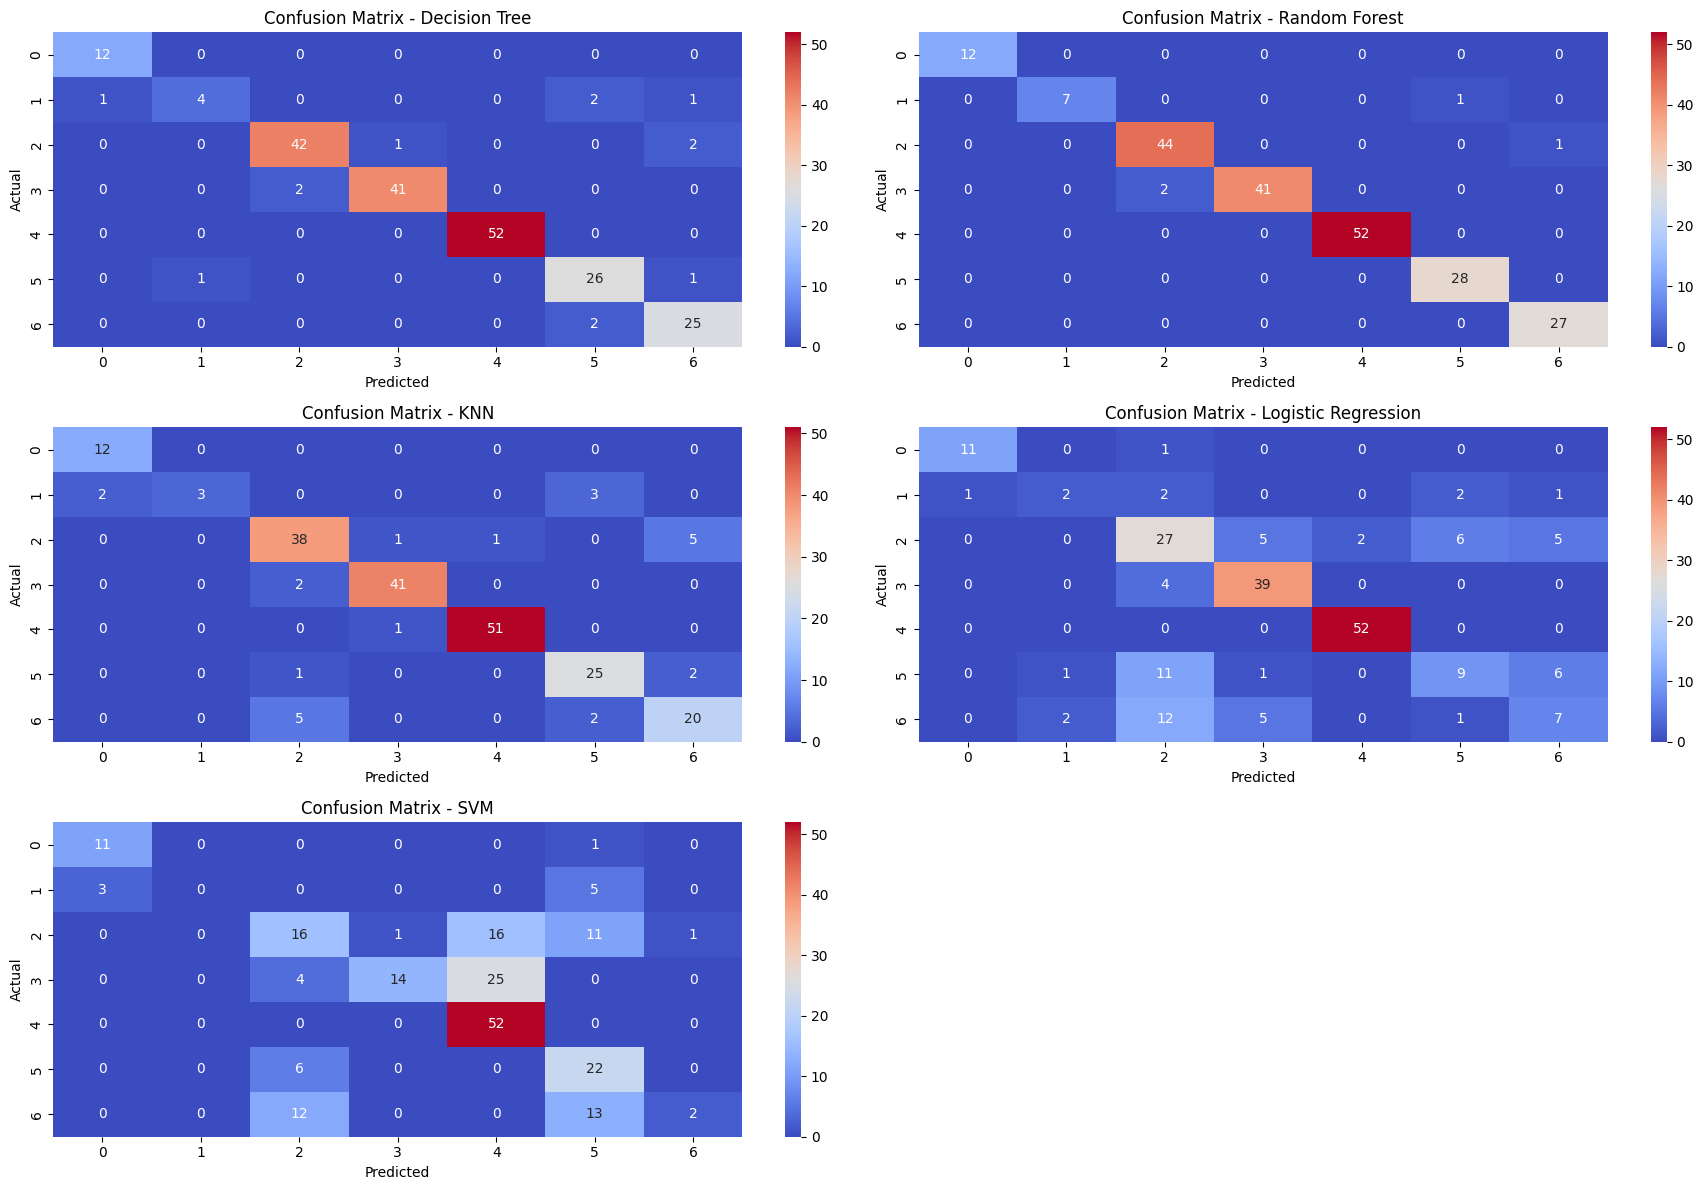

In [23]:
plt.figure(figsize=(18, 12))

for i, (name, model) in enumerate(models.items(), 1):
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    result[name] = {
        'accuracy': acc,
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1-score': report['weighted avg']['f1-score'],
        'train_time': end - start
    }

    # Gambar confusion matrix
    plt.subplot(3, 2, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

Dari hasil confusion matrix di atas, dapat diketahui bahwa model SVM dan Logistic Regression terjadi banyak sekali salah prediksi, yang aslinya obesitas malah hasil prediksinya overweight, begitu pula sebaliknya